# Assignment 1: Comparison of Regression Models on Housing Prices in Boston, MA

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Boston, MA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

For this assignment, we are tasked with predicting the housing prices in Boston, MA
(although the data is from Ames, Iowa). We proceed by building a Machine Learning 
model that is based off of some type of regression. Specifically, we are trying to predict
the sales price of a home given some of its key characteristics (ie: size, the year it
was built, etc.). We can expect that there is a linear relationship between how good the 
key characteristics are (brand new, lots of square footage, good location for example) 
and the sale price of a home. We can then use this model to predict the prices of other 
houses given the same data, that way people can set realistic expectations for what they 
can afford to buy based on its qualities. As previously stated, sales price is the key 
characteristic to evaluate since that is the most important component when it comes to 
buying a house. We think that from our data, we will be able to see which components are 
integral to the price of a house. We were given a dataset with 81 features (categorical 
and numerical) that are commonly used to describe homes, as well as 1460 data points from 
existing homes. There are several regression methods that will be used to predict the 
sales price, which will then be compared against one another. Some examples are linear 
regression, decision tree regressor, and random forest regressor. To make sure that the 
model is actually useful, we will spend as much effort as needed. However, once the model 
becomes "useable", it becomes very easy to spend lots of time tuning the model to make it 
work better, with marginal reward. While this is a very important part of machine learning, 
there comes a point where tuning the model (based on your dataset and your knowledge of 
machine learning) becomes a time sink. We are assuming that sales price is the most important
feature to consider since that is the one that we are training our model to predict. I believe 
this assumption is valid because as previously stated, sales price is most likely the 
determining factor people consider when buying a house.

In [1]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [2]:
import pandas as pd

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle  
  HOUSING_PATH = os.path.join("trainData") 
  csv_path = os.path.join(HOUSING_PATH, "train.csv")
  housing = pd.read_csv(csv_path)
  return housing
  

trainingData = loadBostonHousingData()
  

In [3]:
trainingData.head(9)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [5]:
corr_matrix = trainingData.corr()
corr_matrix.shape

(38, 38)

In [6]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

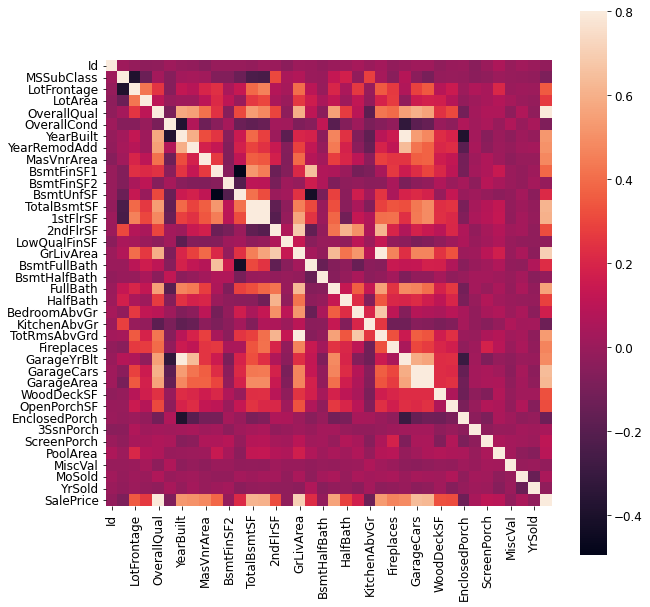

In [15]:
#From this heatmap, we can find which characteristics have a 'meaningful' correlation with sale price
import seaborn
corrmat = trainingData.corr()
plt.subplots(figsize=(10, 10))
seaborn.heatmap(corrmat, vmax=.8, square=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69b5846cd0>,
      dtype=object)

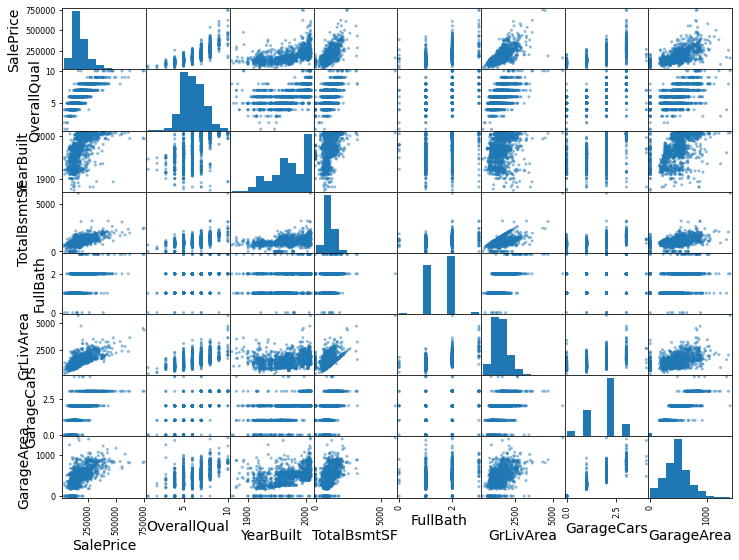

In [7]:
#Using the features that have a meaningful correlation from the heatmap, we can graph their correlations below
from pandas.plotting import scatter_matrix

attributes = ['SalePrice', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'GrLivArea', 'GarageCars', 'GarageArea']

scatter_matrix(trainingData[attributes], figsize=(12, 9))
# save_fig("scatter_matrix_plot")

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(trainingData, test_size=0.2, random_state=42)

In [ ]:
# Create the features and labels for training
housing = train_set.drop("SalePrice", axis=1) # drop labels for training set
housing_labels = train_set["SalePrice"].copy()

housing_num = housing.select_dtypes(include=[np.number])
housing_cat = housing.select_dtypes(include=[object])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.11928402, -0.8667643 , -0.01246836, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.79046412,  0.07410996, -0.50235683, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.21615189, -0.63154574, -0.14607431, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [ 1.32669882, -0.8667643 , -0.45782152, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [ 0.30597137, -0.16110861, -0.6804981 , ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 0.93157852,  1.48542135, -0.76956873, ..., -0.09274033,
        -0.13341669,  0.89367742]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# housing_prepared
print(housing.shape)
print(housing_prepared.shape)

(1168, 80)
(1168, 303)


In [ ]:
housing_prepared

<1168x303 sparse matrix of type '<class 'numpy.float64'>'
	with 93440 stored elements in Compressed Sparse Row format>

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
# Linear Regression RMSE
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18895.24551372116

In [ ]:
# Linear Regression Stats
display_scores(lin_rmse)

Scores: 18895.24551372116
Mean: 18895.24551372116
Standard deviation: 0.0


In [ ]:
# Linear Regression 5-fold CV
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [29559.7723539  37234.49578264 75242.33164131 39609.75198036
 36337.11326883]
Mean: 43596.69300540764
Standard deviation: 16171.31000408576


In [ ]:
# Decision Tree Regressor RMSE
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
# Decision Tree Regressor Stats
display_scores(tree_rmse)

Scores: 0.0
Mean: 0.0
Standard deviation: 0.0


In [ ]:
# Decision Tree Regression 5-fold CV
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [45985.73987671 52659.98754703 59215.07740894 37577.06629752
 36880.69840547]
Mean: 46463.71390713395
Standard deviation: 8625.847543192707


In [ ]:
# Random Forest Regressor RMSE
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11209.087513837094

In [ ]:
# Random Forest Regressor Stats
display_scores(forest_rmse)

Scores: 11209.087513837094
Mean: 11209.087513837094
Standard deviation: 0.0


In [ ]:
# Random Forest Regressor 5-fold CV
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [30044.61219756 36207.1667737  37294.56315381 25358.15986473
 25799.19056798]
Mean: 30940.73851155768
Standard deviation: 5030.111255219258


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #randomizing settings to see the best settings
from scipy.stats import randint

param_distribs = {
        'n_estimators': [1000],
        'max_features': [50,80,100], 
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


30191.756243071413 {'n_estimators': 1000, 'max_features': 50}
30005.05510413518 {'n_estimators': 1000, 'max_features': 80}
30073.315098327465 {'n_estimators': 1000, 'max_features': 100}


## Step 7: Solution Presentation
Now you need to write a short memo (one paragraph) to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

This model is able to predict the sales price of homes with an RMSE
of less than 30,000. It utilizes advanced regression algorithms along
with 5-fold cross validation to find the minimal RMSE of the sales price, 
offering high accuracy values that can be used by customers to predict
what homes they can afford. I learned that sales price of homes have 
interesting correlations with overall quality, year built, total basement 
square footage, full bath, ground living area, and garage area. While there 
are other characteristics of a house, none of them seemed to have strong 
relationships with the sales price. Moving forward, we can use more 
sophisticated regression algorithms (like XGboost) and better fine tune 
the hyperparameters to see if there are lower RMSE values.

All of the hyperparameters that were tested:
* 29865.55410622163 {'n_estimators': 200, 'max_features': 80}
* 32284.32573866324 {'n_estimators': 200, 'max_features': 10}
* 30857.15276804893 {'n_estimators': 200, 'max_features': 20}
* 30471.641481994655 {'n_estimators': 200, 'max_features': 30}
* 30401.095658865106 {'n_estimators': 200, 'max_features': 40}
* 29844.99118427976 {'n_estimators': 200, 'max_features': 50}
* 30243.97791083771 {'n_estimators': 200, 'max_features': 60}
* 30397.16410011413 {'n_estimators': 200, 'max_features': 70}
* 37998.19417985231 {'n_estimators': 100, 'max_features': 1}
* 37883.75677991128 {'n_estimators': 200, 'max_features': 1}
* 32158.265774678504 {'n_estimators': 300, 'max_features': 10}
* 34153.10603532533 {'n_estimators': 300, 'max_features': 5}
* 34638.16563716928 {'n_estimators': 100, 'max_features': 5}
* 29865.55410622163 {'n_estimators': 200, 'max_features': 80}
* 30016.365640494703 {'n_estimators': 200, 'max_features': 100}
* 30237.104465387176 {'n_estimators': 100, 'max_features': 100}
* 29923.595319980403 {'n_estimators': 300, 'max_features': 50}
* 37838.85729594611 {'n_estimators': 300, 'max_features': 1}
* 52222.84215903958 {'n_estimators': 1, 'max_features': 100}
* 31808.465205063145 {'n_estimators': 10, 'max_features': 80}
* 62307.984784358356 {'n_estimators': 1, 'max_features': 1}
* 45850.01659607321 {'n_estimators': 1, 'max_features': 80}
* 35103.69937129984 {'n_estimators': 10, 'max_features': 10}
* 55110.39273417918 {'n_estimators': 1, 'max_features': 5}
* 41795.01805126235 {'n_estimators': 10, 'max_features': 1}
* 34074.145397976776 {'n_estimators': 10, 'max_features': 100}
* 54157.791347370054 {'n_estimators': 1, 'max_features': 10}
* 30909.565304715223 {'n_estimators': 10, 'max_features': 50}

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!